In [1]:
from gaussian_fermions import * #Can be installed with pip install gaussian_fermions

L = 20 #System length
N_shots = 0#1e6 #Whether to include Gaussian noise
N = 15 #Number of evolution times
T = 15 #Evolution time
beta = 3 #Inverse temperature

# (a) Create a thermal state
H_nnh = nearest_neighbor_hopping( L )
cov_thermal = H_nnh.cov_thermal( beta )

# (b) Double up the lattice
cov_ini =  np.kron( cov_thermal, [ [ 0, 0 ], [ 0, 1 ] ] ) 

# (c) Quench to NN and evolve to equidistant times
H_quench = nearest_neighbor_hopping( 2 * L )
times = np.linspace( 0, T, N )

# (d) Measure local particle numbers
if N_shots != 0:
    sigma = 1. / np.sqrt( N_shots / N )
else:
    sigma = 0
    
data = [ H_quench.cov_evolve( cov_ini, t ).real.diagonal(0) + np.random.normal( 0, sigma, 2*L ) for t in times ]

## Run tomography
#
from hopping_tomography import * #Source: https://github.com/marekgluza/hopping_tomography

tomography = hopping_tomography( data, times, H_quench ) #Create an object using particle number data, times, and the model
tomography.recover_SDP( SDP_constraints = True, verbose = True ) #, eps = 1e-5, max_iters = 2500 )


Final residue: -4.0542519677151264e-06
Normalized residue /size/times  -2.702834645143418e-07
Reconstructed matrix
 [[ 1.09383541e-06-4.04947940e-22j -2.23270035e-18+6.34805492e-06j
  -1.11218576e-06+4.98141909e-17j ... -3.93727630e-19-2.24340866e-06j
   2.00421235e-06-1.48492137e-17j  7.21821781e-20+9.08294381e-06j]
 [-2.35714722e-18-6.34805785e-06j  4.99996126e-01+6.71094053e-22j
  -6.89223226e-17-5.22355770e-06j ... -1.40170271e-07-1.05101794e-17j
  -5.22074418e-17-2.00541024e-05j  5.36594316e-05+3.02655218e-18j]
 [-1.11218425e-06-4.97768615e-17j -6.88141474e-17+5.22356032e-06j
  -3.17669804e-07-1.02863979e-21j ... -1.95172763e-18+5.04823936e-06j
  -2.25353276e-06-2.08860901e-16j  4.91185947e-18-1.35515197e-05j]
 ...
 [-6.17110200e-19+2.24340925e-06j -1.40170284e-07+1.04111646e-17j
  -2.16842787e-18-5.04823928e-06j ...  4.99995876e-01+1.51987747e-21j
   6.21613631e-18-1.50519410e-06j -3.72856587e-01-4.67791224e-18j]
 [ 2.00421402e-06+1.47988720e-17j -5.21670933e-17+2.00541041e-05j
 

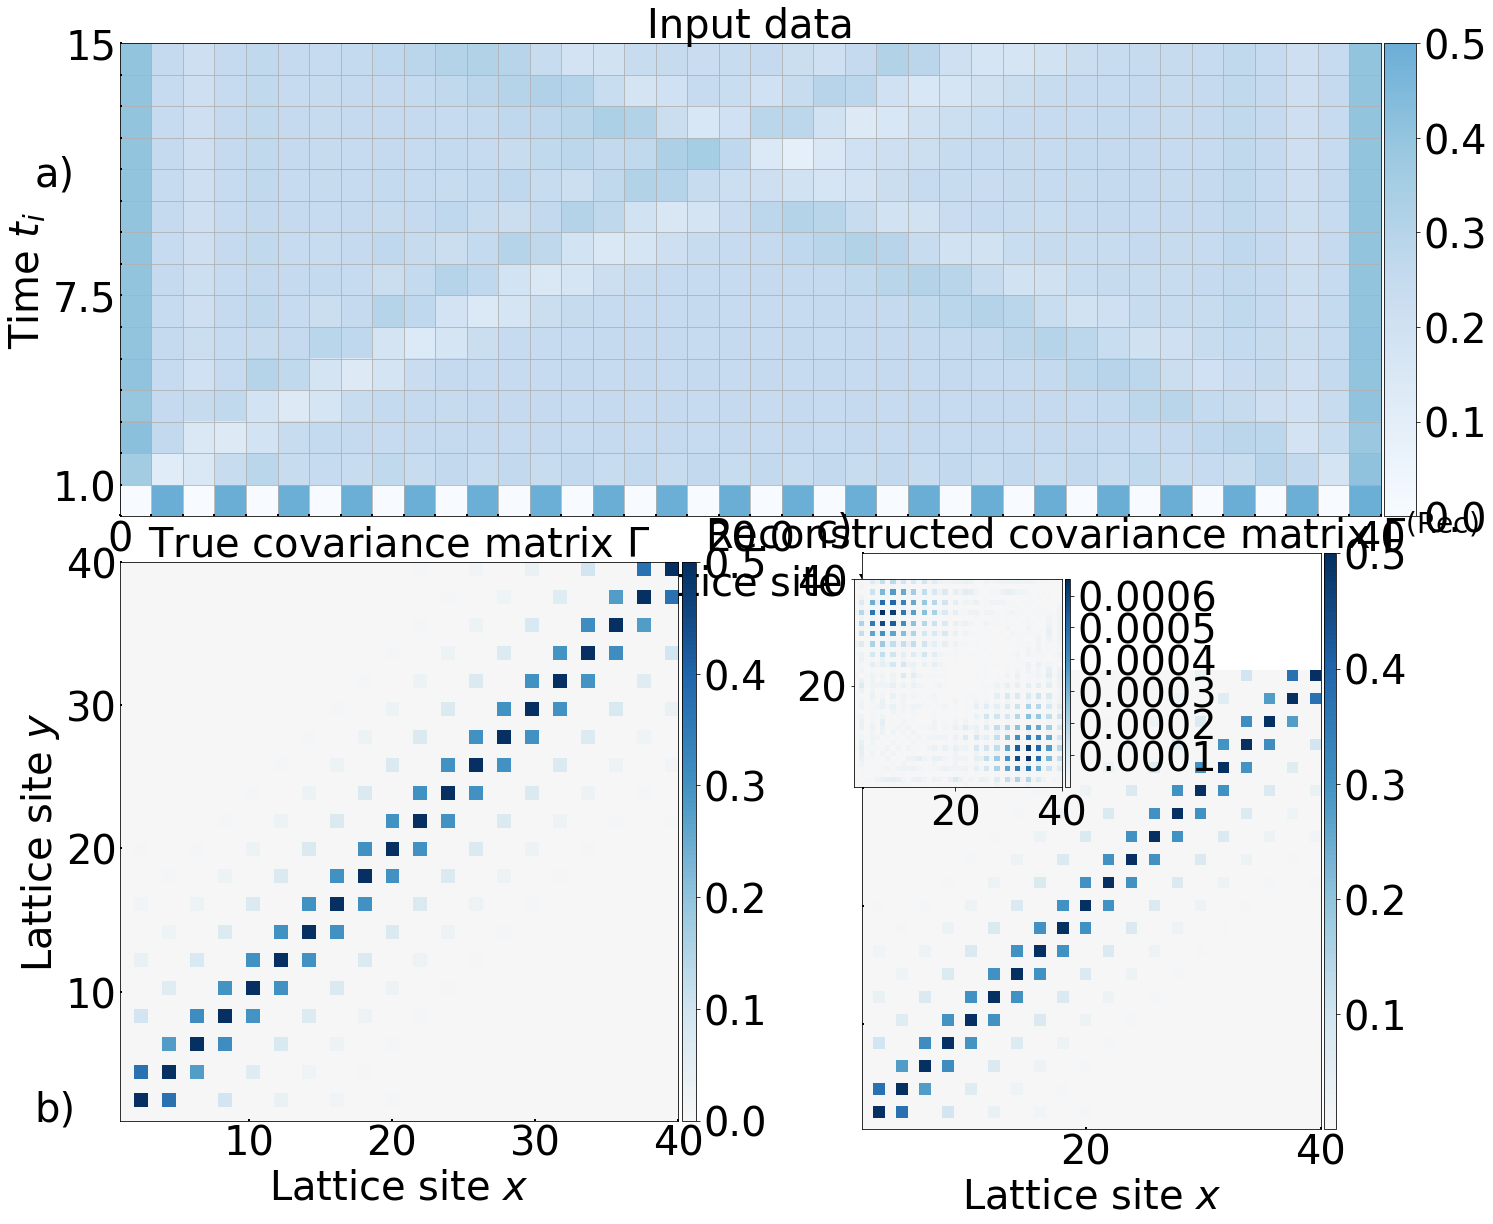

In [6]:
LL=tomography.LL
save_path = 'figs/tomography_main_L_'+str(L)+'_T_'+str(T)+'_N_'+str(N)+'_sigma_'+str( int( np.ceil(sigma) ) )+'.pdf'

fontsize = 40
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['font.size'] = fontsize

#Main plot
fig = plt.figure( figsize = ( 20,20 ) )

data_pos_x  = 0.06
data_pos_y = .49
data_height = 0.4
data_width = 0.9

ini_pos_x  = 0.06
ini_pos_y = .1
ini_height = 0.4
ini_width = ini_height

rec_pos_x  = 0.54
rec_pos_y = .1
rec_height = 0.4
rec_width = rec_height

inset_pos_x = 0.57
inset_pos_y = 0.335   
inset_height = 0.15
inset_width = 0.15

label_a_x = -2.7
label_a_y = 10.5
label_b_x = -5
label_b_y = 1   
label_c_x = -3
label_c_y = 51

## a)
#Input data
ax_input_data = fig.add_axes( [ data_pos_x, data_pos_y, data_width, data_height ] )   


plt.text( label_a_x,label_a_y, 'a)')


im_input_data = ax_input_data.imshow( data, cmap='Blues', aspect = 'auto', interpolation = None, 
                                     extent= [0, LL, N, 0])

title = r'Input data'
plt.title( title )
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Time $t_i$' )
plt.clabel = r'$N_x(t)$'

plt.grid() 

plt.xlim((0,LL))
N = len( times )        
plt.ylim((0,N))

xlabels = ['']*(LL+1)
xlabels[0]='0'
xlabels[-1]=(LL)
xlabels[int(LL/2)] =(LL/2)
ylabels = ['']*(N+1)
ylabels[1]=T/N
ylabels[-1]=T
ylabels[int(N/2)]= ( (T/2))
#ylabels[5]= ( (T/2))

plt.xticks( range(0,L+1),xlabels )
plt.yticks( range(0,N+1), ylabels)

ax_input_data.tick_params(direction='in', length=2, width=2, colors='k')#,    grid_color='k', grid_alpha=0.5)

divider = make_axes_locatable(ax_input_data)
cax = divider.append_axes("right", size="2.5%", pad=0.05)        
cbar = plt.colorbar(im_input_data, cax=cax)
cbar.set_clim( 0, 1 )
ax_input_data.set_aspect(1)

## b)
#Plot cov_ini
ax_cov_ini = fig.add_axes( [ ini_pos_x, ini_pos_y, ini_width, ini_height ] )

im_cov_ini = ax_cov_ini.imshow( abs(cov_ini), cmap='RdBu', aspect='equal', interpolation = None, extent = [ 1, LL, LL, 1])
title = r'True covariance matrix $\Gamma$'
plt.title( title )
plt.text( label_b_x,label_b_y, 'b)')
plt.xlim((1,L))
plt.ylim((1,L))
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Lattice site $y$' )
ax_cov_ini.tick_params(direction='in', length=2, width=2, colors='k')
divider = make_axes_locatable(ax_cov_ini)
cax = divider.append_axes("right", size="2.5%", pad=0.05)

cbar = plt.colorbar(im_cov_ini, cax=cax)
range_plot = np.max( np.abs( cov_ini ) )
cbar.set_clim( -range_plot, range_plot )

## c)
#Plot cov reconstructed + inset deviation

ax_cov_rec = fig.add_axes( [ rec_pos_x, rec_pos_y, rec_width, rec_height ] )
cov_rec = abs(tomography.Gamma)
inset_cov = abs( cov_ini - tomography.Gamma )
im_cov_rec = ax_cov_rec.imshow( cov_rec, cmap='RdBu', aspect='equal', interpolation = None, extent = [ 1, LL, LL, 1])
plt.text( label_c_x,label_c_y, 'c)')

title = r'Reconstructed covariance matrix $\Gamma^{\rm(Rec)}$'
plt.title( title )
plt.xlim((1,LL))
plt.ylim((1,LL))
plt.xlabel( 'Lattice site $x$' )
ylabels = ['']*5
plt.yticks(range(10,51,10), ylabels)
ax_cov_rec.tick_params(direction='in', length=2, width=2, colors='k')

divider = make_axes_locatable( ax_cov_rec )
cax_cov_rec = divider.append_axes("right", size="2.5%", pad=0.05)

cbar = plt.colorbar( im_cov_rec, cax = cax_cov_rec )
range_plot = np.max( np.abs( cov_rec ) )
cbar.set_clim( -range_plot, range_plot )

#inset 
inset = fig.add_axes( [ inset_pos_x, inset_pos_y, inset_width, inset_height ] )
im2 = inset.imshow( inset_cov, extent = [ 1, LL, LL, 1], cmap='RdBu', aspect='equal', interpolation = None)
plt.xlim((1,LL))
plt.ylim((1,LL))
divider2 = make_axes_locatable(inset)
cax_cov_rec2 = divider2.append_axes("right", size="2.5%", pad=0.05)
cbar2 = plt.colorbar(im2, cax = cax_cov_rec2 )
range_plot = np.max( np.abs( inset_cov ) )
cbar2.set_clim( -range_plot, range_plot )


plt.savefig( save_path, format='pdf')
plt.show()


In [3]:
data2 = [ H_quench.cov_evolve( tomography.Gamma, t ).real.diagonal(0) 
         -H_quench.cov_evolve( cov_ini, t ).real.diagonal(0)for t in times ]
np.linalg.norm(data2)

1.3785700473380349e-05

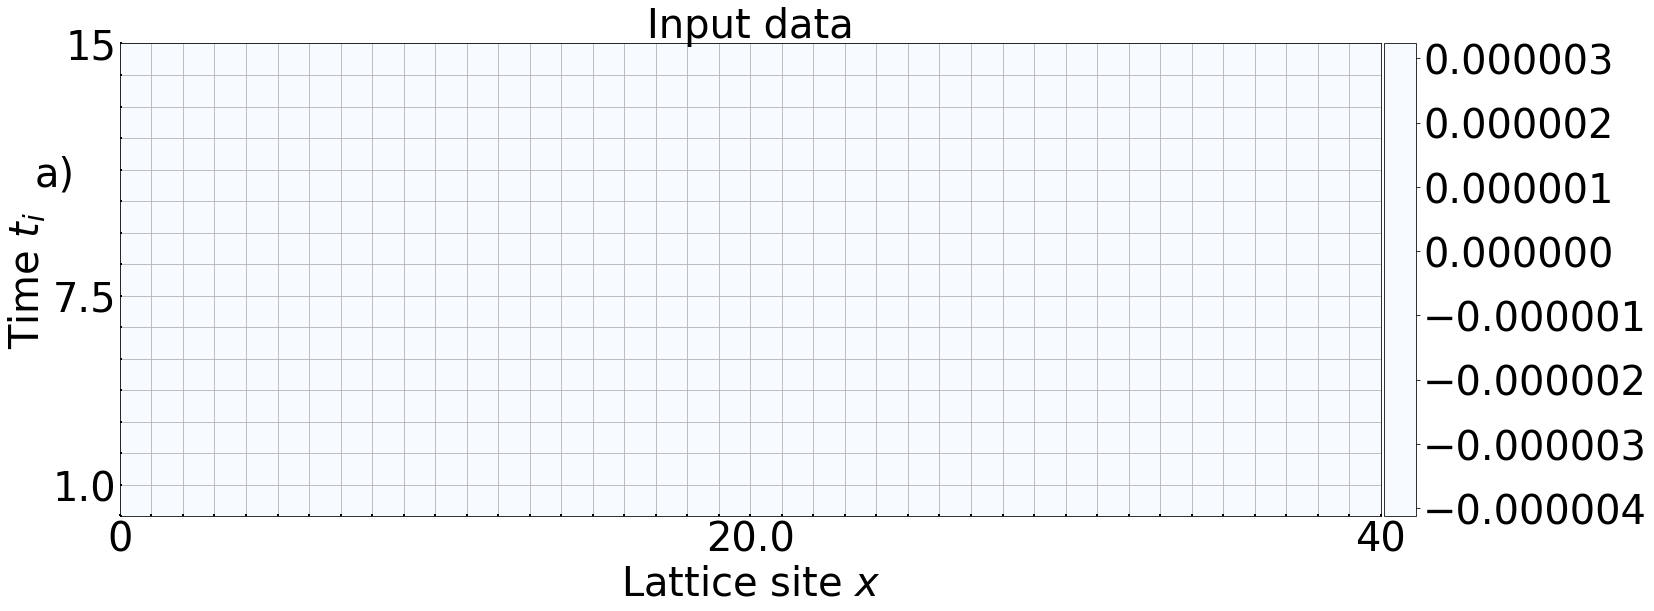

In [4]:
L=40
save_path = 'figs/tomography_double_check_L_'+str(L)+'_T_'+str(T)+'_N_'+str(N)+'_sigma_'+str( int( np.ceil(sigma) ) )+'.pdf'

fontsize = 40
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['font.size'] = fontsize

#Main plot
fig = plt.figure( figsize = ( 20,20 ) )

data_pos_x  = 0.06
data_pos_y = .49
data_height = 0.4
data_width = 0.9

ini_pos_x  = 0.06
ini_pos_y = .1
ini_height = 0.4
ini_width = ini_height

rec_pos_x  = 0.54
rec_pos_y = .1
rec_height = 0.4
rec_width = rec_height

inset_pos_x = 0.57
inset_pos_y = 0.335   
inset_height = 0.15
inset_width = 0.15

label_a_x = -2.7
label_a_y = 10.5
label_b_x = -5
label_b_y = 51   
label_c_x = -3
label_c_y = 51

## a)
#Input data
ax_input_data = fig.add_axes( [ data_pos_x, data_pos_y, data_width, data_height ] )   


plt.text( label_a_x,label_a_y, 'a)')


im_input_data = ax_input_data.imshow( data2, cmap='Blues', aspect = 'auto', interpolation = None, 
                                     extent= [0, L, N, 0])

title = r'Input data'
plt.title( title )
plt.xlabel( 'Lattice site $x$' )
plt.ylabel( 'Time $t_i$' )
plt.clabel = r'$N_x(t)$'

plt.grid() 

plt.xlim((0,L))
N = len( times )        
plt.ylim((0,N))

xlabels = ['']*(L+1)
xlabels[0]='0'
xlabels[-1]=(L)
xlabels[int(L/2)] =(L/2)
ylabels = ['']*(N+1)
ylabels[1]=T/N
ylabels[-1]=T
ylabels[int(N/2)]= ( (T/2))
#ylabels[5]= ( (T/2))

plt.xticks( range(0,L+1),xlabels )
plt.yticks( range(0,N+1), ylabels)

ax_input_data.tick_params(direction='in', length=2, width=2, colors='k')#,    grid_color='k', grid_alpha=0.5)

divider = make_axes_locatable(ax_input_data)
cax = divider.append_axes("right", size="2.5%", pad=0.05)        
cbar = plt.colorbar(im_input_data, cax=cax)
cbar.set_clim( 0, 1 )
ax_input_data.set_aspect(1)




plt.savefig( save_path, format='pdf')
plt.show()
